In [27]:
do_upsampling = True

##### Required modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from lightgbm import LGBMClassifier
import lightgbm as lgb

import catboost as cb
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from sklearn.utils import resample

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from scipy.stats import uniform as sp_uniform

In [3]:
import warnings; warnings.simplefilter('ignore')

##### Loading Given mortgage dataset using the Pandas library. 


In [4]:
dataframe = pd.read_csv("CAX_MortgageModeling_Train.csv",header=0)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 22 columns):
Unique_ID            45642 non-null object
MORTGAGE NUMBER      45642 non-null int64
PROPERTY VALUE       45642 non-null int64
MORTGAGE PAYMENT     45642 non-null int64
GDS                  45642 non-null float64
LTV                  45642 non-null float64
TDS                  45642 non-null float64
AMORTIZATION         45642 non-null int64
MORTGAGE AMOUNT      45642 non-null float64
RATE                 45642 non-null float64
MORTGAGE PURPOSE     45642 non-null object
PAYMENT FREQUENCY    45642 non-null object
PROPERTY TYPE        45642 non-null object
TERM                 45642 non-null int64
FSA                  45642 non-null object
AGE RANGE            45642 non-null object
GENDER               45642 non-null object
INCOME               45642 non-null int64
INCOME TYPE          45642 non-null int64
NAICS CODE           45642 non-null object
CREDIT SCORE         45642 non-nu

In [196]:
dataframe=dataframe.drop('Unique_ID', axis=1)
dataframe=dataframe.drop('MORTGAGE NUMBER', axis=1)

In [197]:
dataframe.head()

,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,Refinance,Monthly,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,Refinance,Monthly,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED
2,531000,2152,30.97,80.00,35.41,360,424800.0,3.5,Purchase,Monthly,Single Detached,6,M1N,35-39,Female,87000,2,72,709,FUNDED
3,1200000,5410,19.04,75.00,34.14,360,960000.0,5.5,Purchase,Monthly,Single Detached,12,M2M,45-49,Male,300000,8,54,761,FUNDED
4,350000,3342,29.59,80.00,34.85,360,592000.0,5.0,Refinance,Monthly,Single Detached,12,L7G,50-54,Male,147000,8,62,762,FUNDED


In [198]:
dataframe.describe()

,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,TERM,INCOME,INCOME TYPE,CREDIT SCORE
count,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,45642.000000,4.564200e+04,45642.000000,45642.000000
mean,5.826110e+05,2392.148043,2.138033e+02,70.632932,4.125670e+02,355.309583,4.255704e+05,4.651149,15.286578,1.251093e+05,5.315017,662.662811
std,4.382082e+05,1688.208721,3.263766e+04,11.566444,6.425859e+04,18.011798,3.020469e+05,0.642371,7.443857,1.149974e+05,3.267761,132.818234
min,1.400000e+04,141.000000,-3.704000e+01,6.667000,-1.070000e+01,60.000000,1.500000e+04,2.500000,6.000000,1.000000e+03,-1.000000,0.000000
25%,3.400000e+05,1406.000000,1.984000e+01,65.000000,3.284000e+01,360.000000,2.459250e+05,4.250000,12.000000,6.800000e+04,2.000000,623.000000
50%,4.770000e+05,2033.000000,2.921000e+01,75.000000,3.830000e+01,360.000000,3.575000e+05,4.500000,12.000000,9.700000e+04,6.000000,677.000000
75%,6.850000e+05,2866.000000,3.587000e+01,80.000000,4.217000e+01,360.000000,5.120000e+05,5.000000,12.000000,1.450000e+05,8.000000,736.000000
max,1.800000e+07,46479.000000,6.872300e+06,95.000000,1.346256e+07,480.000000,7.500000e+06,10.000000,60.000000,3.860000e+06,20.000000,899.000000


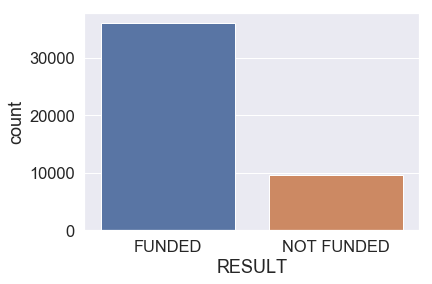

FUNDED        78.925113
NOT FUNDED    21.074887
Name: RESULT, dtype: float64

In [199]:
dataframe['RESULT'].value_counts()
sns.countplot(x='RESULT',data=dataframe)
plt.show()
(dataframe["RESULT"].value_counts()/dataframe.shape[0]*100)

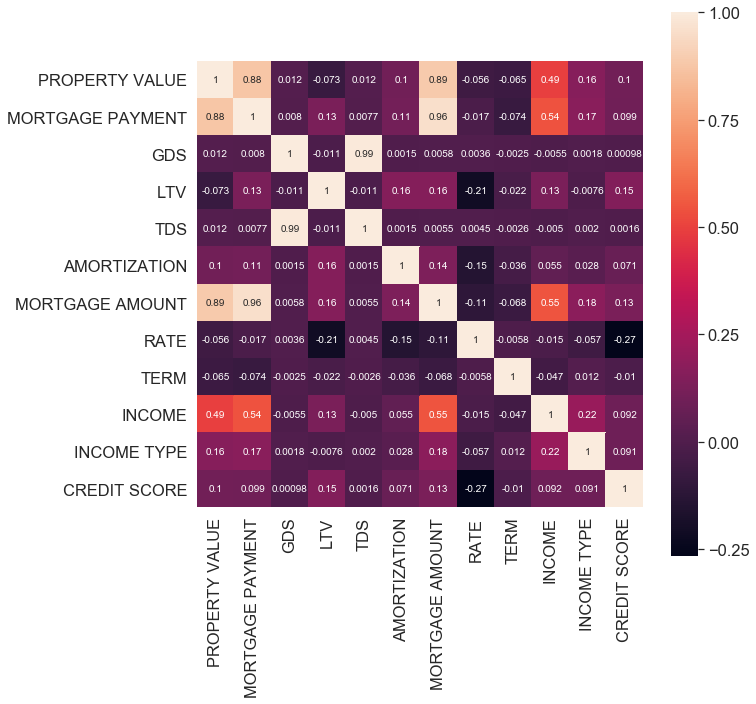

In [200]:
#draw correlation matrix table
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(dataframe.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

property value -- mortgage amount(0.89) mortgage payment(0.88)
mortgage payment -- mortgage amount(0.96)  property value(0.88)
gds - tds(0.99)
mortgage amount -- income (0.55)
mortgage payment --  income (0.54)

In [6]:
df = dataframe.copy() 

In [7]:

naics_codes_int = df['NAICS CODE'].unique()
#naics_codes_int =np.insert(naics_codes_int,0, '21')
naics_codes_int =  np.sort(naics_codes_int)
print("naics_codes_int :", naics_codes_int)

naics_codes_str = np.array(['Agri', 'Utils','Const', 'ManFac', 'wTrade',
                            'rTrade', 'Trans','Info', 'FinIns', 'RelEst','Prof',
                            'ManCE', 'AdmSer','EduSer', 'hCare','Arts', 'AFSer', 'oSer' ,'PubAdm'])

NAICS_int2str = dict(zip(naics_codes_int, naics_codes_str))
#print(NAICS_int2str)


df['NAICS_CODE_STR'] = df['NAICS CODE'].map(NAICS_int2str)
df['NAICS_CODE_STR'] = pd.Categorical(df['NAICS_CODE_STR'])
df['NAICS_CODE_STR'].head(5)

naics_codes_int : ['11' '22' '23' '31-33' '42' '44-45' '48-49' '51' '52' '53' '54' '55' '56'
 '61' '62' '71' '72' '81' '92']
{'11': 'Agri', '22': 'Utils', '23': 'Const', '31-33': 'ManFac', '42': 'wTrade', '44-45': 'rTrade', '48-49': 'Trans', '51': 'Info', '52': 'FinIns', '53': 'RelEst', '54': 'Prof', '55': 'ManCE', '56': 'AdmSer', '61': 'EduSer', '62': 'hCare', '71': 'Arts', '72': 'AFSer', '81': 'oSer', '92': 'PubAdm'}


0    rTrade
1    AdmSer
2     AFSer
3      Prof
4     hCare
Name: NAICS_CODE_STR, dtype: category
Categories (19, object): [AFSer, AdmSer, Agri, Arts, ..., hCare, oSer, rTrade, wTrade]

In [8]:
#In FSA, the first character identifies territory
df['Territory'] = df['FSA'].map(lambda x: str(x)[0] )
df['Territory'] = pd.Categorical(df['Territory'])
df['Territory'].unique()

[L, M, K, T, N, ..., P, G, R, X, W]
Length: 17
Categories (17, object): [L, M, K, T, ..., G, R, X, W]

In [9]:

#In FSA, the second character (which is a number) identifies whether the area is urban or rural.
#A zero indicates a wide-area rural region, while all other digits indicate urban areas.

# start stop and step variables 
#start, stop, step = 1, 2, 1
#df["TerritoryURW"]= df["FSA"].str.slice(start, stop, step)

df['TerritoryURW'] = df['FSA'].map(lambda x: str(x)[1] )
df['TerritoryURW'] = pd.Categorical(df['TerritoryURW'])
df['TerritoryURW'].unique()

[4, 9, 1, 2, 7, 3, 6, 8, 0, 5]
Categories (10, object): [4, 9, 1, 2, ..., 6, 8, 0, 5]

In [10]:
df['TerritorySR'] = df['FSA'].map(lambda x: str(x)[2] )
df['TerritorySR'] = pd.Categorical(df['TerritorySR'])

df['TerritorySR'].unique()

[C, T, N, M, G, ..., S, A, Z, X, L]
Length: 20
Categories (20, object): [C, T, N, M, ..., A, Z, X, L]

In [11]:

df['MA2MP'] = df['MORTGAGE AMOUNT']/df['MORTGAGE PAYMENT']

#ltv = mortgage amount / property value --> property value  = mortgage amount / LTV

# new LTV
df['NEW LTV'] = df['MORTGAGE AMOUNT'] / df['PROPERTY VALUE']

#find property value based on LTV
df['NEW PROPERTY VALUE'] = df['MORTGAGE AMOUNT'] / (df['LTV']/100)

#find diff between given property value and  calculated property value based on LTV
df['PROPERTY VALUE DIFF'] =  df['NEW PROPERTY VALUE'] - df['PROPERTY VALUE'] 


no_of_payments_dict = {'Monthly' : 12 , 'Bi-Weekly' : 24,'Bi-Weekly Accelerated': 26,'Semi-Monthly':24,'Weekly' : 52 ,'Weekly Accelerated' : 52}
df['nEMIs'] = df['PAYMENT FREQUENCY'].map(no_of_payments_dict)

# tds = exp/income  --> exp = tds*income; but  balance = income - exp --> income - tds*income = (1-tds)*income
df['EYI'] = df['nEMIs'] * df['MORTGAGE PAYMENT']
df['TDS'] = df['TDS']/100.0
df['BAL'] = df['INCOME']*(1.0- df['TDS'])
df['EYI2INC'] = df['EYI']/df['INCOME']
df['TE'] = (df['TDS'] + df['EYI2INC'])

df.drop(['nEMIs', 'EYI',  'BAL', 'EYI2INC', ] , axis=1, inplace=True)
df.drop(['NAICS CODE', 'AGE RANGE', 'FSA'], axis=1, inplace=True)
df.drop(['MORTGAGE AMOUNT', 'MORTGAGE PAYMENT', 'PROPERTY VALUE','TDS', 'GENDER'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45642 entries, 0 to 45641
Data columns (total 23 columns):
Unique_ID              45642 non-null object
MORTGAGE NUMBER        45642 non-null int64
GDS                    45642 non-null float64
LTV                    45642 non-null float64
AMORTIZATION           45642 non-null int64
RATE                   45642 non-null float64
MORTGAGE PURPOSE       45642 non-null object
PAYMENT FREQUENCY      45642 non-null object
PROPERTY TYPE          45642 non-null object
TERM                   45642 non-null int64
INCOME                 45642 non-null int64
INCOME TYPE            45642 non-null int64
CREDIT SCORE           45642 non-null int64
RESULT                 45642 non-null object
NAICS_CODE_STR         45642 non-null category
Territory              45642 non-null category
TerritoryURW           45642 non-null category
TerritorySR            45642 non-null category
MA2MP                  45642 non-null float64
NEW LTV                45642 n

In [13]:
df.head()

,Unique_ID,MORTGAGE NUMBER,GDS,LTV,AMORTIZATION,RATE,MORTGAGE PURPOSE,PAYMENT FREQUENCY,PROPERTY TYPE,TERM,...,RESULT,NAICS_CODE_STR,Territory,TerritoryURW,TerritorySR,MA2MP,NEW LTV,NEW PROPERTY VALUE,PROPERTY VALUE DIFF,TE
0,CAX_Train_1,1,61.98,65.00,360,4.0,Refinance,Monthly,Single Detached,12,...,FUNDED,rTrade,L,4,C,191.563824,1.155556,1.600000e+06,700000.000000,1.319522
1,CAX_Train_2,2,35.22,74.29,360,4.5,Refinance,Monthly,Single Detached,12,...,FUNDED,AdmSer,L,9,T,178.981184,1.010363,5.249697e+05,138969.713286,0.741731
2,CAX_Train_3,3,30.97,80.00,360,3.5,Purchase,Monthly,Single Detached,6,...,FUNDED,AFSer,M,1,N,197.397770,0.800000,5.310000e+05,0.000000,0.650928
3,CAX_Train_4,4,19.04,75.00,360,5.5,Purchase,Monthly,Single Detached,12,...,FUNDED,Prof,M,2,M,177.449168,0.800000,1.280000e+06,80000.000000,0.557800
4,CAX_Train_5,5,29.59,80.00,360,5.0,Refinance,Monthly,Single Detached,12,...,FUNDED,hCare,L,7,G,177.139437,1.691429,7.400000e+05,390000.000000,0.621316


In [14]:
df_cat = df.select_dtypes(['object','category'])
df_num = df.select_dtypes(exclude = ['object','category'])

In [15]:
df_cat['MORTGAGE PURPOSE'] = pd.Categorical(df_cat['MORTGAGE PURPOSE'])
df_cat['PAYMENT FREQUENCY'] = pd.Categorical(df_cat['PAYMENT FREQUENCY'])
df_cat['PROPERTY TYPE'] = pd.Categorical(df_cat['PROPERTY TYPE'])
df_cat['RESULT'] = pd.Categorical(df_cat['RESULT'])


In [16]:
dfC = pd.concat([df_num, df_cat], axis=1)


In [17]:
dfC = dfC[['INCOME TYPE', 'INCOME', 'MA2MP', 'NEW LTV','LTV', 'TE', 'NEW PROPERTY VALUE',
           'PROPERTY VALUE DIFF', 'CREDIT SCORE', 'RESULT', 'GDS',  'PROPERTY TYPE', 'MORTGAGE PURPOSE',
           'AMORTIZATION', 'TERM', 'RATE', 'PAYMENT FREQUENCY', 
           'Territory', 'TerritoryURW', 'TerritorySR',  'NAICS_CODE_STR' ]]

#dfC['AbR'] = dfC['RATE'] / dfC['AMORTIZATION']
#dfC['AbR'] = dfC['INCOME']/dfC['RATE'] * dfC['AMORTIZATION'] 
#dfC.drop(['RATE', 'AMORTIZATION' ] , axis=1, inplace=True)

In [18]:
dfC.head()

,INCOME TYPE,INCOME,MA2MP,NEW LTV,LTV,TE,NEW PROPERTY VALUE,PROPERTY VALUE DIFF,CREDIT SCORE,RESULT,...,PROPERTY TYPE,MORTGAGE PURPOSE,AMORTIZATION,TERM,RATE,PAYMENT FREQUENCY,Territory,TerritoryURW,TerritorySR,NAICS_CODE_STR
0,8,108000,191.563824,1.155556,65.00,1.319522,1.600000e+06,700000.000000,681,FUNDED,...,Single Detached,Refinance,360,12,4.0,Monthly,L,4,C,rTrade
1,2,78000,178.981184,1.010363,74.29,0.741731,5.249697e+05,138969.713286,710,FUNDED,...,Single Detached,Refinance,360,12,4.5,Monthly,L,9,T,AdmSer
2,2,87000,197.397770,0.800000,80.00,0.650928,5.310000e+05,0.000000,709,FUNDED,...,Single Detached,Purchase,360,6,3.5,Monthly,M,1,N,AFSer
3,8,300000,177.449168,0.800000,75.00,0.557800,1.280000e+06,80000.000000,761,FUNDED,...,Single Detached,Purchase,360,12,5.5,Monthly,M,2,M,Prof
4,8,147000,177.139437,1.691429,80.00,0.621316,7.400000e+05,390000.000000,762,FUNDED,...,Single Detached,Refinance,360,12,5.0,Monthly,L,7,G,hCare


In [213]:
#dfC.info()

In [19]:
dfw1 = dfC.copy()

In [20]:
dummy_list =  ['MORTGAGE PURPOSE','PAYMENT FREQUENCY', 'PROPERTY TYPE', 
                'Territory', 'TerritoryURW', 'TerritorySR', 'NAICS_CODE_STR']

In [21]:
dfw1 = pd.get_dummies(dfw1, columns = dummy_list,  drop_first=False)

In [22]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
dfw1['RESULT']= label_encoder.fit_transform(dfw1['RESULT']) 

In [23]:
dfw1.dtypes

INCOME TYPE                                  int64
INCOME                                       int64
MA2MP                                      float64
NEW LTV                                    float64
LTV                                        float64
TE                                         float64
NEW PROPERTY VALUE                         float64
PROPERTY VALUE DIFF                        float64
CREDIT SCORE                                 int64
RESULT                                       int32
GDS                                        float64
AMORTIZATION                                 int64
TERM                                         int64
RATE                                       float64
MORTGAGE PURPOSE_Purchase                    uint8
MORTGAGE PURPOSE_Refinance                   uint8
PAYMENT FREQUENCY_Bi-Weekly                  uint8
PAYMENT FREQUENCY_Bi-Weekly Accelerated      uint8
PAYMENT FREQUENCY_Monthly                    uint8
PAYMENT FREQUENCY_Semi-Monthly 

In [24]:
dfw1["RESULT"].value_counts()

0    36023
1     9619
Name: RESULT, dtype: int64

In [25]:
# Divide in to train and test
yw1 = dfw1["RESULT"]
Xw1 = dfw1.drop('RESULT', axis=1)

Xw1_train, Xw1_val, yw1_train, yw1_val =train_test_split(Xw1, yw1, test_size=0.05, random_state=42)

In [29]:
# up smaple the train data

if do_upsampling == True :

    df_train = pd.concat([Xw1_train, yw1_train], axis=1)
    
    # Separate majority and minority classes
    df_majority = df_train[df_train.RESULT==0]
    df_minority = df_train[df_train.RESULT==1]

    majority_rows = df_majority.shape[0]
    
    # Upsample minority class
    df_minority_upsampled = resample(df_minority,
                                     replace=True,     # sample with replacement
                                     n_samples=majority_rows,    # to match majority class
                                     random_state=123) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    
    # Display new class counts
    df_upsampled.RESULT.value_counts()

    # Divide trainin data into inputs and output
    yw1_train = df_upsampled["RESULT"]
    Xw1_train = df_upsampled.drop('RESULT', axis=1)
        
    

In [30]:
df_upsampled.RESULT.value_counts()

1    34215
0    34215
Name: RESULT, dtype: int64

In [32]:
yw1_val.value_counts()

0    1808
1     475
Name: RESULT, dtype: int64

In [31]:
print(Xw1_train.shape)
print(Xw1_val.shape)
print(yw1_train.shape)
print(yw1_val.shape)

(68430, 95)
(2283, 95)
(68430,)
(2283,)


# LightBoost

In [33]:

if do_upsampling == True :
    
    model_lgb = LGBMClassifier(max_depth=-1,num_leaves = 20, objective='binary',
                               n_estimators=485, learning_rate= 0.1, scale_pos_weight = 0.8, random_state =42 )
    
    #This also works. improves minority class prediction
    #model_lgb = LGBMClassifier(max_depth=-1,num_leaves = 20, objective='binary',
    #                           n_estimators=500, learning_rate= 0.16, is_unbalance  = True,  random_state =42)

    
else :
    
    model_lgb = LGBMClassifier(max_depth=-1,num_leaves = 20, objective='binary',
                               n_estimators=500, learning_rate= 0.160, is_unbalance  = True,  random_state =42)
    
    


model_lgb.fit(Xw1_train, yw1_train)

predictions_lgb = model_lgb.predict(Xw1_val)
    
print('Testing Accuarcy: ',accuracy_score(yw1_val, predictions_lgb))
print("Training Accuracy: ", model_lgb.score(Xw1_train, yw1_train))

# making a classification report
cr = classification_report(yw1_val , predictions_lgb)
print(cr)

# making a confusion matrix
cm = confusion_matrix(yw1_val, predictions_lgb)
print(cm)

Testing Accuarcy:  0.7787998247919404
Training Accuracy:  0.8352038579570363
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1808
           1       0.47      0.48      0.47       475

    accuracy                           0.78      2283
   macro avg       0.67      0.67      0.67      2283
weighted avg       0.78      0.78      0.78      2283

[[1550  258]
 [ 247  228]]
